In [1]:
%%capture
!pip install beautifulsoup4

In [2]:
import requests
from bs4 import BeautifulSoup
import json
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt

In [3]:
MAIN_URL = 'https://yandex.ru/images/search?text='
query = 'кассовый чек'

In [4]:
resp = requests.get(MAIN_URL + query)
soup = BeautifulSoup(resp.text)

In [5]:
images = []

for img in soup.find_all('div', attrs={'data-bem': True}):
    try:
        img_src = json.loads(img['data-bem'])['serp-item']['preview'][0]['url']
        images.append(img_src)
    except:
        continue
        
for i in range(len(images)):
    if images[i].startswith('//'):
        images[i] = 'https:' + images[i]

In [6]:
print('\n'.join(images[:5]))

http://m-edi-a.ru/wp-content/uploads/2015/06/Snimok-ekrana-2015-06-29-v-23.00.01.png
https://avatars.mds.yandex.net/i?id=62ae0c7ecc7270911601192447bd208c_l-5253042-images-thumbs&n=13
https://avatars.mds.yandex.net/i?id=7d8fe02d1bd3a4540fcc9562a25bddf9_l-5220800-images-thumbs&n=13
https://orenburzhie.ru/wp-content/uploads/2021/08/1617937173_cheki-1.png
https://avatars.mds.yandex.net/i?id=fdee1886a0022f28a41cea93b70607e3_l-3380677-images-thumbs&n=13


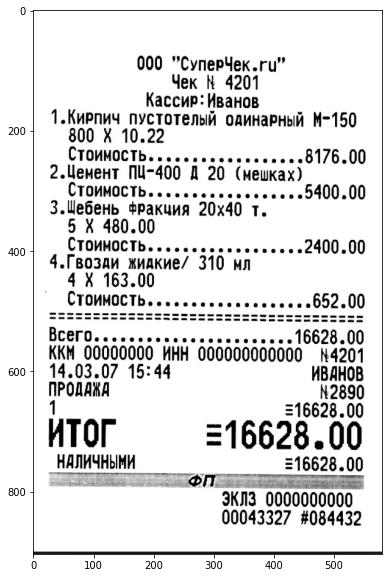

In [7]:
img = requests.get(images[0])
img = Image.open(BytesIO(img.content))
plt.figure(figsize=(10, 10))
plt.imshow(img);